In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt  
import os
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
import keras
import datetime
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Lasso
from keras.datasets import mnist
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score


In [304]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [305]:
# read data for the Boston Housing Study
# creating data frame restdata
# initial work with the data set
image_train = pd.read_csv('train.csv')

image_test = pd.read_csv('test.csv')


In [306]:
feature=[]
for i in range(784):
    feature.append("pixel"+str(i))
# Separating out the features
image_features = image_train.loc[:,feature].values
# Separating out the labels
labels = image_train.loc[:,['label']].values
# Standardizing the features
image_features_standardized = StandardScaler().fit_transform(image_features)

#x_train, x_test, y_train, y_test = train_test_split(image_features_standardized, labels, test_size=0.2, random_state=42)

In [317]:
# Make an instance of the Model
x_predict = image_test.loc[:,feature].values
# print(x_predict)
x_predict_standardized = StandardScaler().fit_transform(x_predict)
# print(x_predict_standardized)

# RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10,
                              max_features = 'sqrt',
                              min_impurity_decrease = 0.1, 
                              bootstrap = True)
rf_start = datetime.datetime.now()
rf.fit(train_img, labels)
y_pred = rf.predict(test_img)
rf_end = datetime.datetime.now()
print('random forest time: ', rf_end-rf_start,' s')

<ipython-input-317-e4cd3948afc7>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_img, labels)


random forest time:  0:00:00.717580  s


In [318]:
#save predict result to csv file
prediction = pd.DataFrame(y_pred, columns=['label']).to_csv('prediction.csv')

In [319]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(image_features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [320]:
finalDf = pd.concat([principalDf, image_train[['label']]], axis = 1)
finalDf

,principal component 1,principal component 2,label
0,-661.589856,-699.358546,1
1,1701.452683,-360.562793,0
2,-886.891183,-293.789639,1
3,-165.756109,300.186528,4
4,1923.709804,-449.152102,0
...,...,...,...
41995,760.355044,-249.844087,0
41996,-1059.876766,-302.267279,1
41997,336.275606,949.963381,7
41998,327.394746,62.056372,6


In [321]:
# Make an instance of the Model
pca = PCA(.95)
pca.fit(image_features)
pca_start = datetime.datetime.now()
train_img = pca.transform(image_features)
train_img  

array([[-661.59577975, -699.31132821,  183.28203965, ...,  -33.68019731,
         -54.49113885,   -9.79971911],
       [1701.4516848 , -360.5515562 , -501.80559391, ...,  -18.55780443,
          11.79296988,   40.93768194],
       [-886.89443411, -293.76578219,   67.15530988, ...,   13.17717056,
         -13.68293201,   20.58543943],
       ...,
       [ 336.26998171,  950.01528029, -168.60541437, ...,  -30.94725229,
           6.05743645,  -21.72403641],
       [ 327.39939154,   62.01608944,  697.53640055, ...,   25.55135179,
         -47.15132888,  -25.90382264],
       [-364.24919987,  418.89302645,   62.89982318, ...,  -36.08844796,
         -58.53511025,  -47.12009068]])

In [322]:
test_img = pca.transform(image_features)
test_img

array([[-661.59577975, -699.31132821,  183.28203965, ...,  -33.68019731,
         -54.49113885,   -9.79971911],
       [1701.4516848 , -360.5515562 , -501.80559391, ...,  -18.55780443,
          11.79296988,   40.93768194],
       [-886.89443411, -293.76578219,   67.15530988, ...,   13.17717056,
         -13.68293201,   20.58543943],
       ...,
       [ 336.26998171,  950.01528029, -168.60541437, ...,  -30.94725229,
           6.05743645,  -21.72403641],
       [ 327.39939154,   62.01608944,  697.53640055, ...,   25.55135179,
         -47.15132888,  -25.90382264],
       [-364.24919987,  418.89302645,   62.89982318, ...,  -36.08844796,
         -58.53511025,  -47.12009068]])

In [323]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, labels)
#logisticRegr.predict(test_img)
pca_end = datetime.datetime.now()

print('pca_time: ', pca_end - pca_start, 's')
#prediction = pd.DataFrame(logisticRegr.predict(test_img), columns=['predictions']).to_csv('prediction_pca.csv')

C:\Users\myl94\anaconda3\envs\py38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


pca_time:  0:00:08.207311 s


C:\Users\myl94\anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [325]:
rf = RandomForestRegressor(n_estimators = 10,
                              max_features = 'sqrt',
                              min_impurity_decrease = 0.1, 
                              bootstrap = True)
pca_rf_start = datetime.datetime.now()
rf.fit(train_img, labels)

pca_rf_end = datetime.datetime.now()
print(pca_rf_end-pca_rf_start,' s')
#prediction = pd.DataFrame(rf.predict(test_img), columns=['predictions']).to_csv('prediction_pca_rf.csv')

<ipython-input-325-fd35d14457e0>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_img, labels)


0:00:00.792810  s


In [377]:
n_digits = 10
x_train, x_test, y_train, y_test = train_test_split(image_features_standardized, labels, test_size=0.2, random_state=42)

kmeans = MiniBatchKMeans(n_clusters = n_digits)
x_train = x_train.reshape(len(x_train),-1)
x_train = x_train.astype(float) / 255
kmeans.fit(x_train)
len(kmeans.labels_)


33600

In [378]:
print(y_train.reshape(1,-1).flatten())


[6 5 3 ... 2 6 0]


In [387]:
def infer_cluster_labels(kmeans,actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels =[]
        index = np.where(kmeans.labels_ ==i)
        labels.append(actual_labels[index])

        if len(labels[0] ==1):
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
             inferred_labels[np.argmax(counts)].append(i)
        else:
             inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels
def infer_data_labels(X_labels, cluster_labels):
 # empty array of len(X)
    #predicted_labels = np.zeros(len(X_labels).astype(np.uint8))
    predicted_labels = np.zeros((len(X_labels),), dtype=np.uint8)
    for i, cluster in enumerate(X_labels):
         for key, value in cluster_labels.items():
                 if cluster in value:
                         predicted_labels[i] = key
    return predicted_labels

In [388]:
print(type(y_train))

<class 'numpy.ndarray'>


In [391]:
y_train = y_train.reshape(1,-1).flatten()
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(x_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (y_train[:20])

[6 3 6 4 7 0 0 9 0 4 4 4 0 9 4 3 1 0 3 0]
[6 5 3 4 7 8 6 7 0 9 9 7 6 9 9 3 1 6 3 0]


<ipython-input-400-90fdb58cb732>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


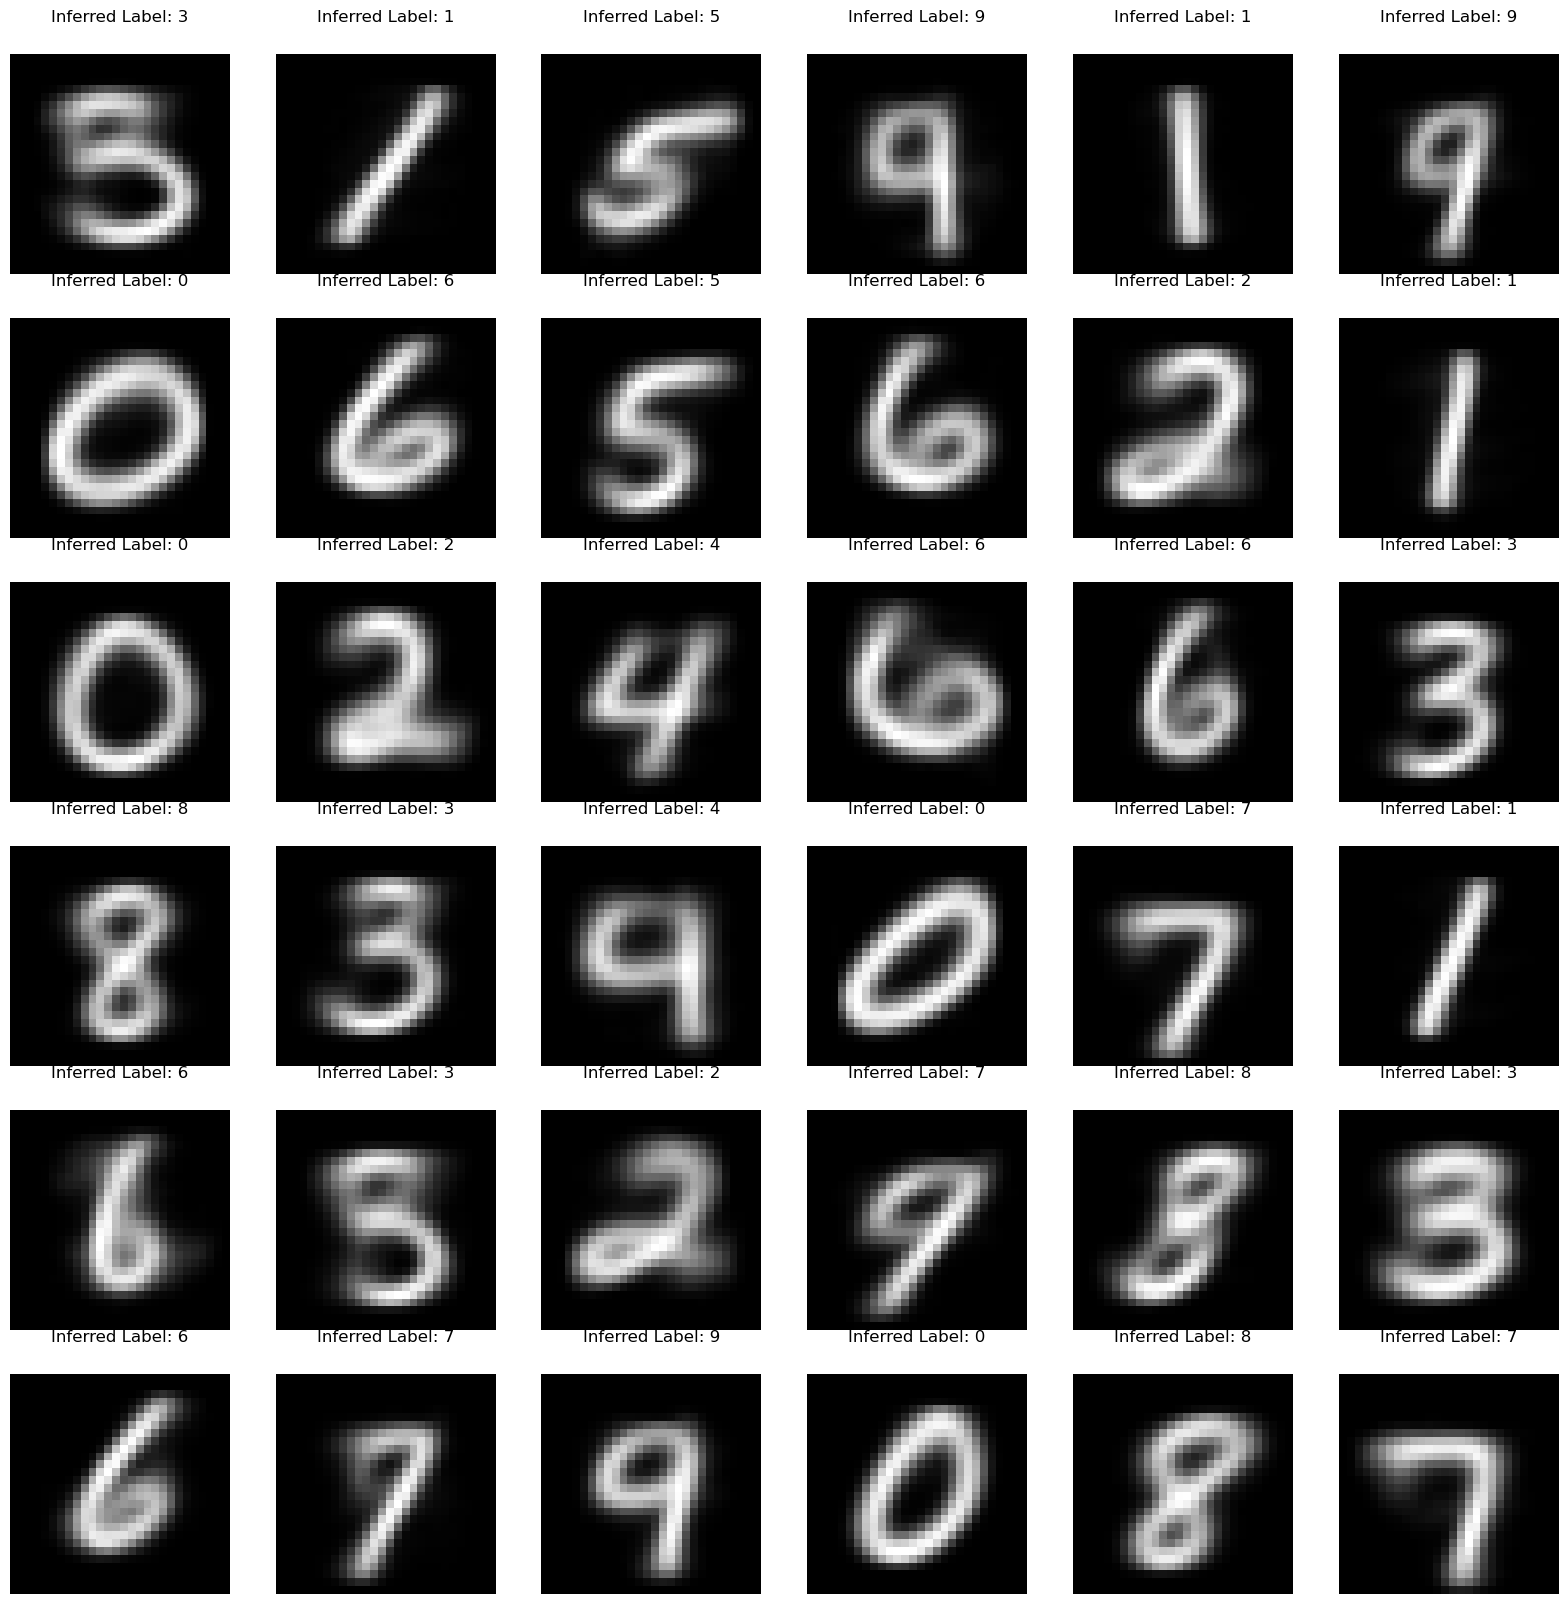

In [400]:
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)
# record centroid values
centroids = kmeans.cluster_centers_

images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)
# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)
# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()
# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):

     # determine inferred label using cluster_labels dictionary
         for key, value in cluster_labels.items():
                 if i in value:
                         ax.set_title('Inferred Label: {}'.format(key))

     # add image to subplot
         ax.matshow(images[i])
         ax.axis('off')

fig.show()


So based on my code, I think the flaw for this experiment is when we using random forest model, the prediction score is really low. After checking my prediction results, I realized that either in random forest classifier or in PCA random forest classifier, the prediction results are decimals. I don't think it is accurate. all the prediction results should be whole number. I also use PCA linear regression. The prediction score is around 0.91, and all the prediction results are whole number. My kaggle score is 0 for random forest, and pca random forest, 0.91 for pca linear regression. and my user ID is Jeffrey Mao.
